# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
data=pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# all the unique values
data.nunique()

Position    10
Level       10
Salary      10
dtype: int64

In [4]:
data['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [5]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


<AxesSubplot: xlabel='Level', ylabel='Salary'>

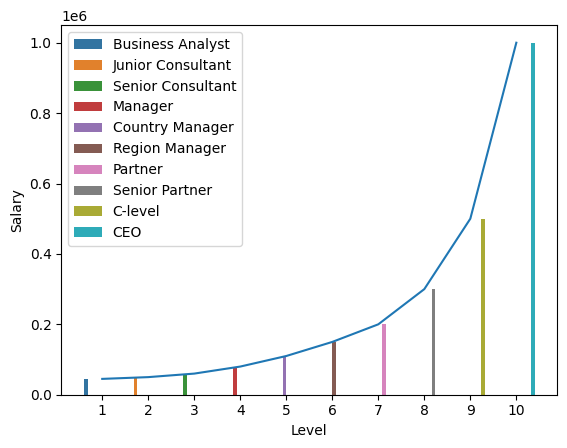

In [9]:
sns.barplot(x=data['Level'],y=data['Salary'],hue=data['Position'])
sns.lineplot(x=data['Position'],y=data['Salary'])

In [10]:
data.corr()

/tmp/ipykernel_5648/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


/tmp/ipykernel_5648/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

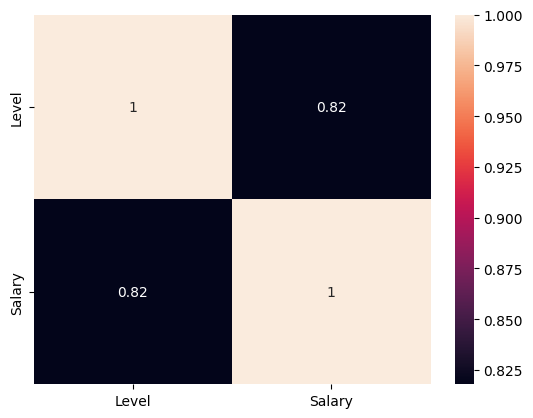

In [11]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot: xlabel='Level', ylabel='Salary'>

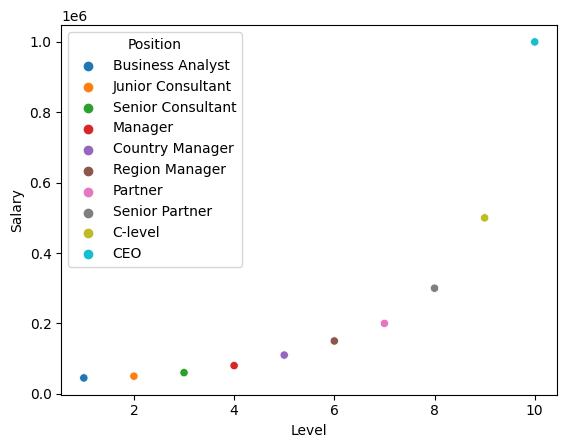

In [12]:
sns.scatterplot(x=data['Level'],y=data['Salary'],hue=data['Position'])

<AxesSubplot: >

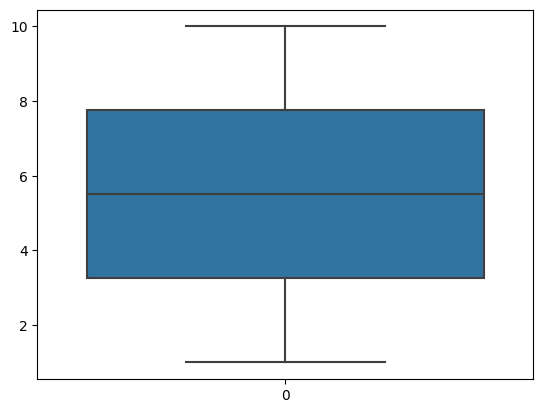

In [13]:
# box-plot
sns.boxplot(data['Level'])

<AxesSubplot: >

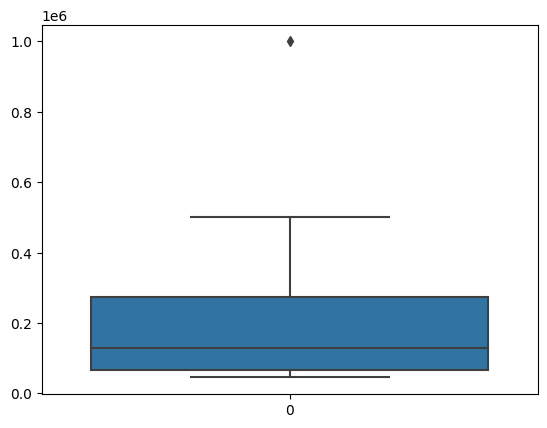

In [14]:
sns.boxplot(data['Salary'])

In [15]:
# extracting and dependent variable
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values
print(x,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [17]:
predict=lin_reg.predict(x)
predict

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

<AxesSubplot: xlabel='Level', ylabel='Salary'>

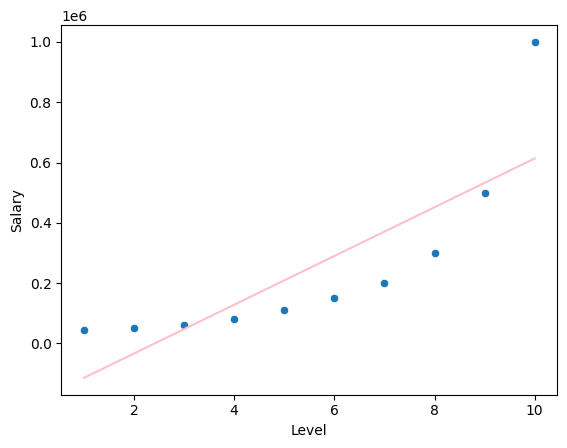

In [18]:
sns.scatterplot(x=data['Level'],y=data['Salary'])
sns.lineplot(x=x[:,0],y=predict,color="pink")

In [19]:
# checking the accuracy and the error
from sklearn import metrics

In [20]:
metrics.r2_score(y,predict)

0.6690412331929895

In [21]:
np.sqrt(metrics.mean_squared_error(y,predict))

163388.73519272613

## Polynomial regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [23]:
# degree=3
poly_reg2=PolynomialFeatures(degree=3)
x_poly2=poly_reg2.fit_transform(x)
x_poly2

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [24]:
# building model with 2 degree

poly_lreg=LinearRegression()
poly_lreg.fit(x_poly,y)

LinearRegression()

In [25]:
predict = poly_lreg.predict(poly_reg.fit_transform(x))
predict

array([118727.27272727,  44151.51515152,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

<AxesSubplot: >

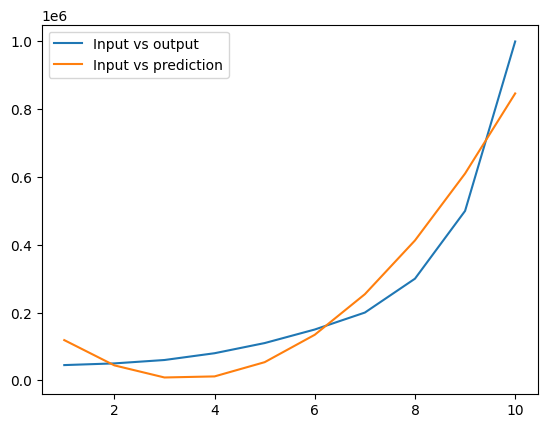

In [26]:
sns.lineplot(x=x[:,0],y=y,label="Input vs output")
sns.lineplot(x=x[:,0],y=predict, label="Input vs prediction")

In [27]:
# prediction of the polynomial regression model with degree 3
poly_lreg2=LinearRegression()
poly_lreg2.fit(x_poly2,y)

LinearRegression()

In [28]:
predict2=poly_lreg2.predict(poly_reg2.fit_transform(x))
predict2

array([ 14902.09790211,  78759.90675991,  94960.37296038,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431235,
       575694.63869463, 950461.53846152])

<AxesSubplot: >

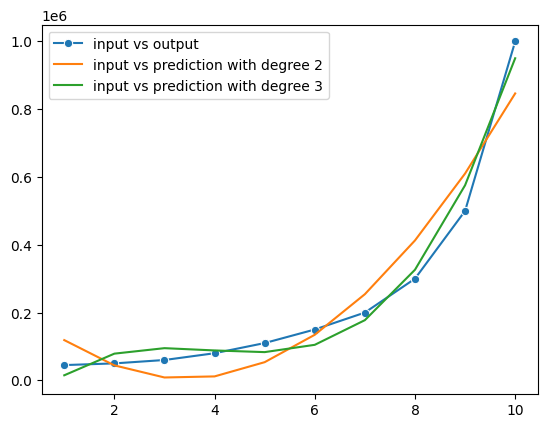

In [29]:
sns.lineplot(x=x[:,0],y=y,label='input vs output',marker='o')
sns.lineplot(x=x[:,0],y=predict,label="input vs prediction with degree 2")
sns.lineplot(x=x[:,0],y=predict2,label="input vs prediction with degree 3")
# you can see accuracy increases or error decreases with the increase in degree

In [30]:
poly_lreg.predict(poly_reg.fit_transform([[5]]))
# poor it is 110000 but it shows 53606 for degree=2 polynomial

array([53606.06060606])

In [31]:
poly_lreg2.predict(poly_reg2.fit_transform([[5]]))
# you can see the better result for the degree 3

array([83270.3962704])

In [32]:
# predicting the accuracy
from sklearn.metrics import r2_score,mean_squared_error

In [33]:
acc1=r2_score(y,predict)
acc2=r2_score(y,predict2)
print('Polynomial regression accuracy for\n degree 2: {}\n degree 2:{}'.format(acc1,acc2))
# you can see the polynomial regression model with degree 3 has good accuracy

Polynomial regression accuracy for
 degree 2: 0.9162082221443943
 degree 2:0.9812097727913366


In [34]:
err=np.sqrt(mean_squared_error(y,predict))
err2=np.sqrt(mean_squared_error(y,predict2))
print('Polynomial regression error for\n degree 2:{}\n degree 3:{}'.format(err,err2))
# you can see the error is reduced

Polynomial regression error for
 degree 2:82212.12400451244
 degree 3:38931.504012329235
